### Datasets

### https://drive.google.com/drive/folders/19XDm8yI3UvApPL9lq3SGoZ-pe0Pxn1fc

### Imports

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import davies_bouldin_score,calinski_harabasz_score

In [36]:
data=pd.read_csv('bank_transactions.csv')

In [37]:
data

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5
...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0
1048563,T1048564,C6459278,20/2/92,M,NASHIK,27311.42,18/9/16,183734,460.0
1048564,T1048565,C6412354,18/5/89,M,HYDERABAD,221757.06,18/9/16,183313,770.0
1048565,T1048566,C6420483,30/8/78,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0


### Cleaning

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [39]:
print(data.isnull().sum())

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64


In [40]:
data=data.dropna()

In [41]:
data.duplicated().sum()

0

### Analysis

In [42]:
feat=['TransactionAmount (INR)','CustAccountBalance']

In [43]:
scaler=StandardScaler()
scaled_feat=scaler.fit_transform(data[feat])

In [44]:
inertia=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,n_init=10,random_state=42)
    kmeans.fit(scaled_feat)
    inertia.append(kmeans.inertia_)

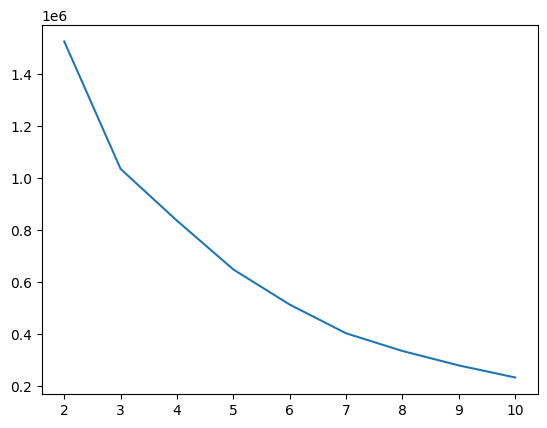

In [45]:
plt.plot(range(2,11),inertia)
plt.show() # Elbow Method to find Optimal k

In [46]:
kmeans=KMeans(n_clusters=3,n_init=10,random_state=42)
labels=kmeans.fit_predict(scaled_feat)

data.loc[:,'Cluster']=labels

C:\Users\Dell\AppData\Local\Temp\ipykernel_13896\1255459425.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Cluster']=labels


### Metrics

In [47]:
db_score = davies_bouldin_score(scaled_feat,labels)
print(f'Davies-Bouldin Index: {db_score}') # Lower the Better

Davies-Bouldin Index: 0.472512381613502


In [48]:
ch_score = calinski_harabasz_score(scaled_feat,labels)
print(f'Calinski-Harabasz Index: {ch_score}') # Higher the Better

Calinski-Harabasz Index: 527867.001636973


### Visualization

In [49]:
cluster_summary=data.groupby('Cluster')[['TransactionAmount (INR)','CustAccountBalance']].mean()
print(cluster_summary)

         TransactionAmount (INR)  CustAccountBalance
Cluster                                             
0                    1274.308955        1.054120e+05
1                   12386.053815        4.820054e+07
2                   71313.089513        4.915656e+05


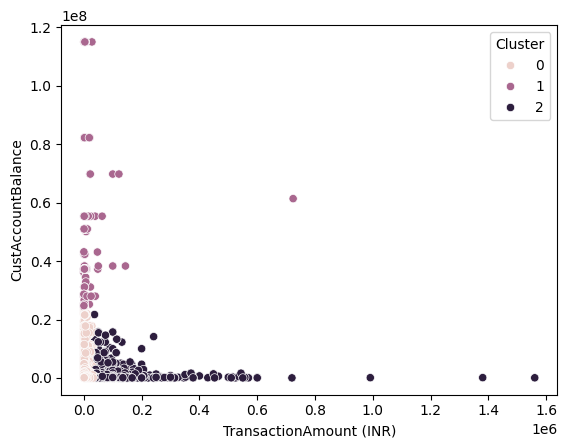

In [50]:
sns.scatterplot(x='TransactionAmount (INR)',y='CustAccountBalance',hue='Cluster',data=data)
plt.show()